# Assignment #2 - Data Gathering and Warehousing - DSSA-5102

In [ ]:
Instructor: Melissa Laurino</br>
Spring 2024</br></br>
Name: Lauren M. Fonseca</br>
Date: 02.01.2024

Our next objective is to choose <b>ONE</b> of the datasets from our previous assignment to explore further. The datasets we have chose for Assignment #1 are managable to clean in R (Or Python if that is what you prefer to explore, see the technology check for working with Python in R in Jupyter notebook). Depending on your data, and especially the size of it, it may be more beneficial to clean in a language we are comfortable working in already instead of cleaning our data in SQL. SQL may be needed for cleaning of databases that are very large or hundreds of terabytes in size. We will clean our datasets first before we attempt to load them into our SQL databases. </br>
Not only is data everywhere, but it can also be messy. Messy data can originate in the data collection process, whether this is occurring with manual data entry and typos, or with outdated collection forms that hold multiple variables that mean the same thing. For example, while collecting data on marine mammals, it is important to note who the observer is. With Python and R, reading excel or csv files, these languages will take the same variable written as, "Melissa Laurino" and "melissa laurino" as two separate observers because they are case sensitive. However, this is not accurate because they are meant to be the same person within the observer column or category.</br>
Clean data is important for consistency that leads to accurate results and analysis. If we are using our data to make informed decisions in our field, we need it to be clean. We do not want to omit rows that may make a difference to our dataset because they do not fit a certain criteria due to typos, but how much should the original dataset be altered? Depending on your field, there may be regulations and compliance standards regarding data quality. Protocols may state if the data does not read exactly how it should be, then it should be ommitted. </br>
For our learning objectives in this class, we will clean our data. Our first assignment in our warehousing journey was important because it allowed us to gain a better understanding of a dataset that we personally did not collect. Now that we have that understanding, we can explore it in greater depth and clean it as necessary.<br>
<br>
It is important when cleaning data to: <br>
*Make detailed comments with your code* <br>
*Record EVERYTHING ommitted and changed if necessary* <br>
*Since we are exploring and learning without a specific organization policy, use your best judgement when ommitting records. If you have chosen to ommit data, please explain why.*</br>
<br>
<b>The code that I have written below is just to give you ideas on exploring and cleaning data. It is encouraged that you explore and clean it in greater detail than what I have written below for full credit.</b><br>
Additional examples: https://epirhandbook.com/en/cleaning-data-and-core-functions.html

<b>Dataset name:</b><br>
<b>Company/Government Organization:</b><br>
Download link:

Load necessary libraries:

In [97]:
#load libraries
library(tidyverse) #Reading data
library(lubridate) #Reading and manipulating dates and times
library(readr) #Reading the CSV data file


Load data into R:

In [71]:
# read in covid data
covid <- read.csv("COVID.csv")

Exploration before cleaning:

In [72]:
#Display the structure of the dataset
str(covid)

#Display a summary of the dataset
summary(covid)

#Display the first few rows
head(covid)

'data.frame':	445 obs. of  88 variables:
 $ month                           : Factor w/ 445 levels "2020-02-11","2020-02-12",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Algeria                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Argentina                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Armenia                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Australia                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Austria                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Bangladesh                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Belarus                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Belgium                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Bolivia                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Bosnia.and.Herzegovina          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Botswana                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Brazil                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Canada                          : num  0 0 0 0 0 0 

        month        Algeria         Argentina        Armenia      
 2020-02-11:  1   Min.   :   0.0   Min.   :    0   Min.   :   0.0  
 2020-02-12:  1   1st Qu.: 127.0   1st Qu.:  774   1st Qu.: 125.0  
 2020-02-13:  1   Median : 193.0   Median : 6134   Median : 317.0  
 2020-02-14:  1   Mean   : 275.2   Mean   : 6714   Mean   : 485.5  
 2020-02-15:  1   3rd Qu.: 387.0   3rd Qu.:10154   3rd Qu.: 662.0  
 2020-02-16:  1   Max.   :1133.0   Max.   :29472   Max.   :2476.0  
 (Other)   :439                                                    
   Australia         Austria       Bangladesh      Belarus      
 Min.   :  0.00   Min.   :   0   Min.   :   0   Min.   :   0.0  
 1st Qu.:  8.00   1st Qu.:  82   1st Qu.: 515   1st Qu.: 183.0  
 Median : 15.00   Median : 750   Median :1517   Median : 844.0  
 Mean   : 67.09   Mean   :1391   Mean   :1706   Mean   : 809.9  
 3rd Qu.: 44.00   3rd Qu.:2229   3rd Qu.:2525   3rd Qu.:1278.0  
 Max.   :716.00   Max.   :9586   Max.   :7626   Max.   :1975.0  
 

month,Algeria,Argentina,Armenia,Australia,Austria,Bangladesh,Belarus,Belgium,Bolivia,...,United.Arab.Emirates,United.Kingdom,Uruguay,United.States,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Grand.Total
2020-02-11,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,2042
2020-02-12,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,418
2020-02-13,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,15153
2020-02-14,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6527
2020-02-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2143
2020-02-16,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2183


In [73]:
#Check for missing values
missing_values <- colSums(is.na(covid))
print(missing_values)

                           month                          Algeria 
                               0                                0 
                       Argentina                          Armenia 
                               0                                0 
                       Australia                          Austria 
                               0                                0 
                      Bangladesh                          Belarus 
                               0                                0 
                         Belgium                          Bolivia 
                               0                                0 
          Bosnia.and.Herzegovina                         Botswana 
                               0                                0 
                          Brazil                           Canada 
                               0                                0 
                           Chile                            Ch

What columns are missing values (If any)? Do you think you should remove the rows of data at this time in the exploration? Why or why not?

There are no missing values in this dataset.

If you chose to remove rows with specific missing values:

In [74]:
#omit step
#Remove rows with missing values...? It is imporant to specify the columns here and explain your thought process.
#data <- na.omit(data)

What about duplicates?

In [75]:
# checking for any duplicates
has_duplicates <- any(duplicated(covid))
print("Data has duplicates:")
print(has_duplicates)

[1] "Data has duplicates:"
[1] FALSE


In [76]:
#There are no duplicates to remove

Let's revisit the structure and look at the data types for each column. This will be important for SQL.

In [58]:
#What are the data types for each column?
print("Original Data Types:")
print(sapply(covid, class))

[1] "Original Data Types:"
                           month                          Algeria 
                        "factor"                        "numeric" 
                       Argentina                          Armenia 
                       "numeric"                        "integer" 
                       Australia                          Austria 
                       "numeric"                        "numeric" 
                      Bangladesh                          Belarus 
                       "numeric"                        "numeric" 
                         Belgium                          Bolivia 
                       "numeric"                        "numeric" 
          Bosnia.and.Herzegovina                         Botswana 
                       "numeric"                        "numeric" 
                          Brazil                           Canada 
                       "numeric"                        "numeric" 
                           Chile   

In [79]:
#convert month to date
covid$month <- as.Date(as.character(covid$month), format = "%Y-%m-%d")

# Identify integer columns
integer_columns <- sapply(covid, is.integer)

# Convert integer columns to numeric
covid[, integer_columns] <- lapply(covid[, integer_columns], as.numeric)



#What are the updated column types?
print("Updated Data Types:")
print(sapply(covid, class))


[1] "Updated Data Types:"
                           month                          Algeria 
                          "Date"                        "numeric" 
                       Argentina                          Armenia 
                       "numeric"                        "numeric" 
                       Australia                          Austria 
                       "numeric"                        "numeric" 
                      Bangladesh                          Belarus 
                       "numeric"                        "numeric" 
                         Belgium                          Bolivia 
                       "numeric"                        "numeric" 
          Bosnia.and.Herzegovina                         Botswana 
                       "numeric"                        "numeric" 
                          Brazil                           Canada 
                       "numeric"                        "numeric" 
                           Chile    

Changing text characters in your data. Make all column names lowercase. Lowercase is easier to read in SQL when we get to that point.

In [80]:
#Make all column names lowercase:
colnames(covid) <- tolower(colnames(covid))
head(covid)

month,algeria,argentina,armenia,australia,austria,bangladesh,belarus,belgium,bolivia,...,united.arab.emirates,united.kingdom,uruguay,united.states,venezuela,vietnam,yemen,zambia,zimbabwe,grand.total
2020-02-11,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,2042
2020-02-12,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,418
2020-02-13,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,15153
2020-02-14,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6527
2020-02-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2143
2020-02-16,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2183


Assignment #1 asked you to create a graph and check for outliers. Are there any outliers in your columns? How can we check for outliers?

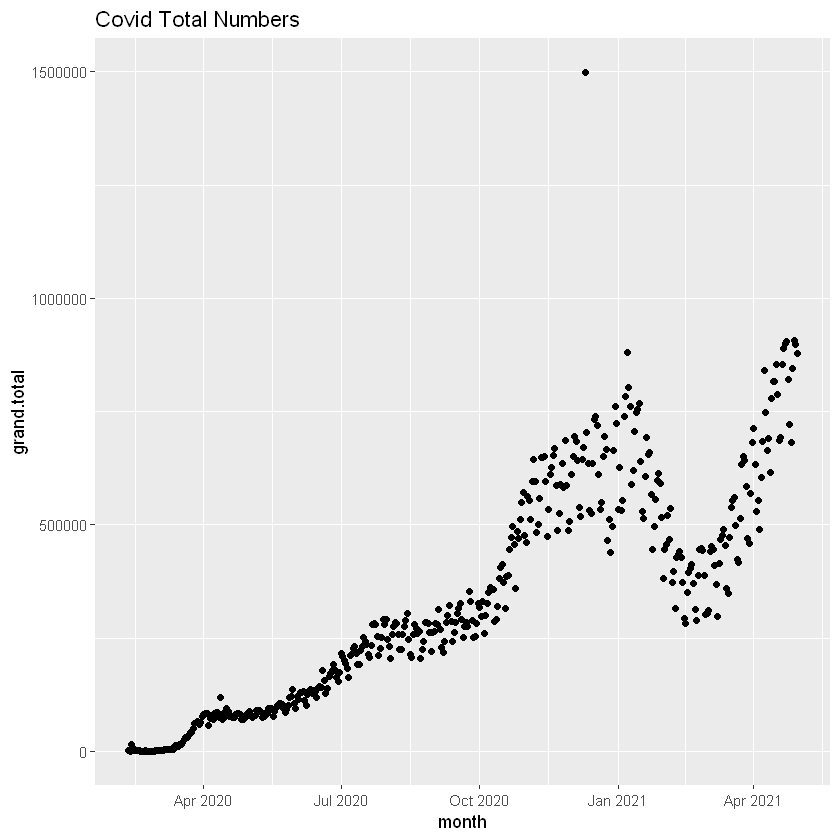

In [98]:
#Not sure if outliers are relevent in this data set since it shows how covid affected different countries. Outliers would be interesting.
#I will, for the sake of learning, create a scatterplot with date and grand total
ggplot(covid, aes(x = month, y = grand.total)) +
  geom_point() +
  ggtitle("Covid Total Numbers")

#The plot below show a particularly active time in December 2020, probably related to the holidays.
#That "outlier" is a necessary data point that adds to the covid story.



<b>To create additional steps for data cleaning in Jupyter notebook: </b><br>
Hit the plus button in the top left corner to add a row of code. <br>
To change from code to text or headers, select from the drop down menu above. <br>
Use "< b r >" (No spaces or quotes) to skip a line in markdown and other HTML text font options.

Additional step #1:

Additional step #2:

Additional step #3:

Lets save our new CLEAN data :) 

In [100]:
#Save the newly cleaned dataset as a NEW file:
write.csv(data, 'cleaned_covid.csv')